# Linear Speed

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NB_BINS = 10

# load data and divide into bins
df = pd.read_csv("/home/norlab/Desktop/doctorat/crv2021/calibration_experiments/linear_deskewed.csv")
df = df.dropna()
df = df.sort_values("linear_speed")
bins_linear_speed = []
bins_residual = []
for i in range(NB_BINS):
    bin_start_index = int((i / NB_BINS) * df.shape[0])
    bin_end_index = int(((i + 1) / NB_BINS) * df.shape[0]) - 1
    bin_data = df[bin_start_index:bin_end_index + 1]
    bins_linear_speed.append(bin_data["linear_speed"])
    bins_residual.append(bin_data["residual"])

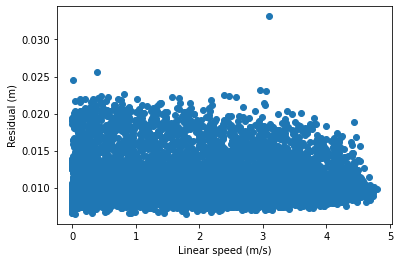

In [57]:
_ = plt.scatter(df["linear_speed"], df["residual"])
_ = plt.xlabel("Linear speed (m/s)")
_ = plt.ylabel("Residual (m)")
# _ = plt.savefig("linear_speed_residual_scatter.png")

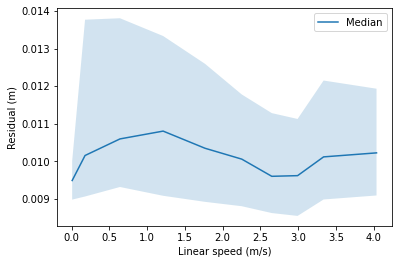

In [58]:
# compute quartiles
x = []
y_q1 = []
y_median = []
y_q3 = []
for i in range(NB_BINS):
    x.append(np.mean(bins_linear_speed[i]))
    y_q1.append(np.quantile(bins_residual[i], 0.25))
    y_median.append(np.median(bins_residual[i]))
    y_q3.append(np.quantile(bins_residual[i], 0.75))

# plot bin medians
_ = plt.plot(x, y_median, label="Median")
_ = plt.fill_between(x, y_q1, y_q3, alpha=0.2)
_ = plt.xlabel("Linear speed (m/s)")
_ = plt.ylabel("Residual (m)")
_ = plt.legend()
# _ = plt.savefig("linear_speed_residual.png")

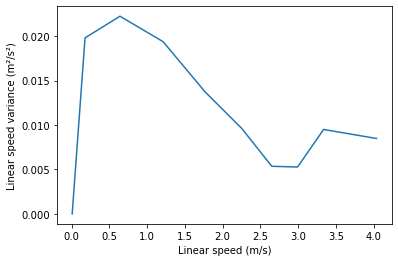

In [59]:
import math

# compute uncertainties
x = []
y = []
for i in range(NB_BINS):
    residual_variance = np.sum(np.square(bins_residual[i])) / len(bins_residual[i])
    if i == 0:
        first_residual_variance = residual_variance
    deskewing_residual_variance = residual_variance - first_residual_variance
    linear_speed_variance = max(0, deskewing_residual_variance * (2 / 0.1)**2)
    x.append(np.mean(bins_linear_speed[i]))
    y.append(linear_speed_variance)

# write uncertainties to file
with open("linear_speed_covariances.csv", "w+") as file:
    previous_max_speed = 0
    file.write("min_speed,max_speed,covariance\n")
    for i in range(NB_BINS):
        min_speed = previous_max_speed
        max_speed = np.max(bins_linear_speed[i])
        file.write(str(min_speed) + "," + str(max_speed) + "," + str(y[i]) + "\n")
        previous_max_speed = max_speed

# plot bin uncertainties
_ = plt.plot(x, y)
_ = plt.xlabel("Linear speed (m/s)")
_ = plt.ylabel("Linear speed variance (m²/s²)")
# _ = plt.savefig("linear_speed_uncertainty.png")

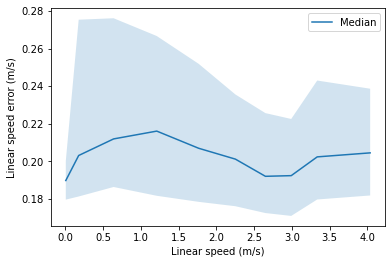

In [60]:
# convert to linear speed error
bins_linear_speed_error = []
for i in range(NB_BINS):
    bins_linear_speed_error.append(bins_residual[i] * 2 / 0.1)

# compute quartiles
x = []
y_q1 = []
y_median = []
y_q3 = []
for i in range(NB_BINS):
    x.append(np.mean(bins_linear_speed[i]))
    y_q1.append(np.quantile(bins_linear_speed_error[i], 0.25))
    y_median.append(np.median(bins_linear_speed_error[i]))
    y_q3.append(np.quantile(bins_linear_speed_error[i], 0.75))

# plot bin medians
_ = plt.plot(x, y_median, label="Median")
_ = plt.fill_between(x, y_q1, y_q3, alpha=0.2)
_ = plt.xlabel("Linear speed (m/s)")
_ = plt.ylabel("Linear speed error (m/s)")
_ = plt.legend()
# _ = plt.savefig("linear_speed_error.png")

# Angular Speed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NB_BINS = 10

# load data and divide into bins
df = pd.read_csv("/home/norlab/Desktop/doctorat/crv2021/calibration_experiments/angular_deskewed.csv")
df = df.dropna()
df = df[df["residual"] < 0.3]
df = df.sort_values("angular_speed")
bins_angular_speed = []
bins_residual = []
for i in range(NB_BINS):
    bin_start_index = int((i / NB_BINS) * df.shape[0])
    bin_end_index = int(((i + 1) / NB_BINS) * df.shape[0]) - 1
    bin_data = df[bin_start_index:bin_end_index + 1]
    bins_angular_speed.append(bin_data["angular_speed"])
    bins_residual.append(bin_data["residual"])

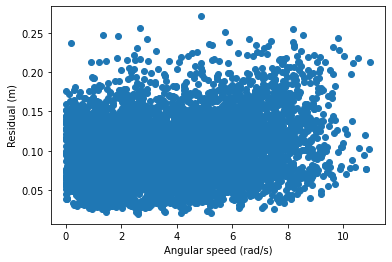

In [2]:
_ = plt.scatter(df["angular_speed"], df["residual"])
_ = plt.xlabel("Angular speed (rad/s)")
_ = plt.ylabel("Residual (m)")
# _ = plt.savefig("angular_speed_residual_scatter.png")

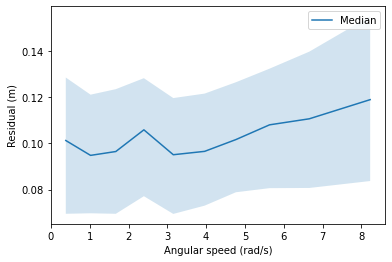

In [3]:
# compute quartiles
x = []
y_q1 = []
y_median = []
y_q3 = []
for i in range(NB_BINS):
    x.append(np.mean(bins_angular_speed[i]))
    y_q1.append(np.quantile(bins_residual[i], 0.25))
    y_median.append(np.median(bins_residual[i]))
    y_q3.append(np.quantile(bins_residual[i], 0.75))

# plot bin medians
_ = plt.plot(x, y_median, label="Median")
_ = plt.fill_between(x, y_q1, y_q3, alpha=0.2)
_ = plt.xlabel("Angular speed (rad/s)")
_ = plt.ylabel("Residual (m)")
_ = plt.legend()
# _ = plt.savefig("angular_speed_residual.png")

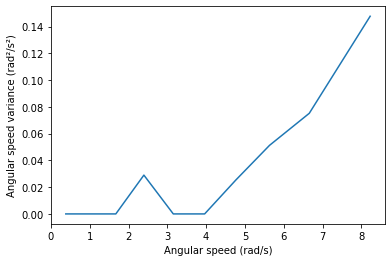

In [4]:
import math

# compute uncertainties
x = []
y = []
for i in range(NB_BINS):
    residual_variance = np.sum(np.square(bins_residual[i])) / len(bins_residual[i])
    if i == 0:
        first_residual_variance = residual_variance
    deskewing_residual_variance = residual_variance - first_residual_variance
    angular_speed_variance = max(0, deskewing_residual_variance * (2 / (0.1 * 4.07322))**2)
    x.append(np.mean(bins_angular_speed[i]))
    y.append(angular_speed_variance)

# write uncertainties to file
with open("angular_speed_covariances.csv", "w+") as file:
    previous_max_speed = 0
    file.write("min_speed,max_speed,covariance\n")
    for i in range(NB_BINS):
        min_speed = previous_max_speed
        max_speed = np.max(bins_angular_speed[i])
        file.write(str(min_speed) + "," + str(max_speed) + "," + str(y[i]) + "\n")
        previous_max_speed = max_speed

# plot bin uncertainties
_ = plt.plot(x, y)
_ = plt.xlabel("Angular speed (rad/s)")
_ = plt.ylabel("Angular speed variance (rad²/s²)")
# _ = plt.savefig("angular_speed_uncertainty.png")

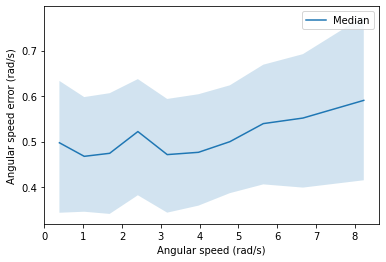

In [22]:
# convert to angular speed error
bins_angular_speed_error = []
for i in range(NB_BINS):
    bins_angular_speed_error.append(bins_residual[i] * 2 / (0.1 * 4.07322))

# compute quartiles
x = []
y_q1 = []
y_median = []
y_q3 = []
for i in range(NB_BINS):
    x.append(np.mean(bins_angular_speed[i]))
    y_q1.append(np.quantile(bins_angular_speed_error[i], 0.25))
    y_median.append(np.median(bins_angular_speed_error[i]))
    y_q3.append(np.quantile(bins_angular_speed_error[i], 0.75))

# plot bin medians
_ = plt.plot(x, y_median, label="Median")
_ = plt.fill_between(x, y_q1, y_q3, alpha=0.2)
_ = plt.xlabel("Angular speed (rad/s)")
_ = plt.ylabel("Angular speed error (rad/s)")
_ = plt.legend()
# _ = plt.savefig("angular_speed_error.png")